/tmp/ipykernel_727059/710470825.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='method', y='reward',data=df_long,     order=method_order,


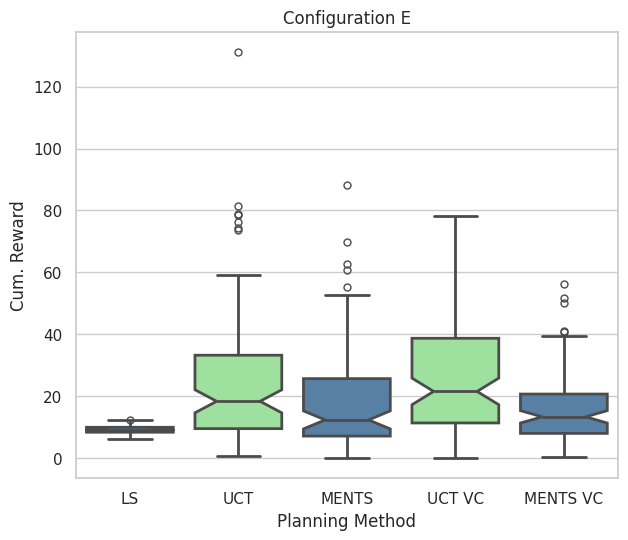

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import config as config

df = pd.read_csv(f'output/v_4/results_multi_{config.config_name}.csv')
df_long = df.melt(var_name='method', value_name='reward')
method_order = ['LS', 'UCT', 'MENTS', 'UCT VC', 'MENTS VC']
colors = ['steelblue', 'lightgreen']
palette = [colors[i % len(colors)] for i in range(len(method_order))]
palette_dict = dict(zip(method_order, palette))

plt.figure(figsize=(7, 5.8))  # Adjust the width and height as needed
# plt.xlabel('Planning Method')
# plt.ylabel('log(costs)')
plt.title(f'Configuration {config.config_name}')
plt.xlabel('Planning Method')
plt.ylabel('Cum. Reward')

sns.set(style='whitegrid')  # Set the style
ax = sns.boxplot(x='method', y='reward',data=df_long,     order=method_order,
    palette=palette_dict, linewidth=2, fliersize=5, notch=True,saturation=0.7)

# Add a horizontal dashed line at a specific value

#vfa_mean = np.median(np.log(data_ments_vfa))
# ax.axhline(y=vfa_mean, color='red', linestyle='--', linewidth=1.5)

# Display the plot
# plt.show( )


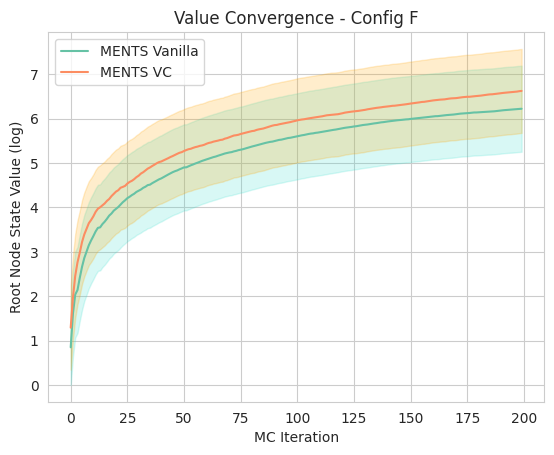

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import config as config 
import seaborn as sns
# Load the data from the CSV file
input_file = f"output_value_conv/value_convergence_config_{config.config_name}.csv"
df = pd.read_csv(input_file)

# Extract data for plotting
iterations = df["iterations"]
root_rewards_1 = df["root_rewards_1"]
root_rewards_2 = df["root_rewards_2"]
sns.set_palette("Set2")
sns.set_style("whitegrid")

# Plot root_rewards_1 (MENTS Vanilla)
mean_1 = root_rewards_1
std_1 = np.std(root_rewards_1)
#ax.plot(iterations, mean_1, color='teal', label='MENTS Vanilla')
sns.lineplot(x=iterations, y=mean_1,  label='MENTS Vanilla')
plt.fill_between(iterations, np.maximum(mean_1 - std_1, 0), mean_1 + std_1, color='turquoise', alpha=0.2)

# Plot root_rewards_2 (MENTS VC)
mean_2 = root_rewards_2
std_2 = np.std(root_rewards_2)
sns.lineplot(x=iterations, y=mean_2, label='MENTS VC')
plt.fill_between(iterations, np.maximum(mean_2 - std_2, 0), mean_2 + std_2, color='orange', alpha=0.2)

# Add labels and title
plt.xlabel('MC Iteration')
plt.ylabel('Root Node State Value (log)')
plt.title(f'Value Convergence - Config {config.config_name}')

# Add legend
plt.legend(loc='upper left')

# Show the plot
plt.show()